<a href="https://colab.research.google.com/github/krittikaroy0/CSE407/blob/main/vgg16_Epoch_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CSE407 Green Computing
#Section 1; SPRING2023
#Paper Title: Development of a Nano-coating-Based Solution for 
#Surface Dirt Removal on Solar Panels through Image Processing Detection
#Group Members:
#1. Shafika Sikander[2019-3-60-057]
#2. Krittika Roy[2020-1-60-065]
#3. Nowshin Tasnia[2020-1-60-197]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

In [ ]:
device_list = tf.test.gpu_device_name()

In [ ]:
device_list

'/device:GPU:0'

In [ ]:
if device_list  != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at:()'.format(device_list))

Found GPU at:()


In [ ]:
import tensorflow as tf
import os
import numpy as np

In [ ]:
base_dir = r"/content/drive/MyDrive/CSE407/Detect_solar_dust/"

In [ ]:
#preprocessing
IMAGE_SIZE= 224
BATCH_SIZE= 64

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./225,
    zoom_range=0.2,
    horizontal_flip= True,
    validation_split=0.1)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./225,
    validation_split=0.1)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    subset='training')

validation_generator= validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE,
    subset='validation')

Found 2307 images belonging to 2 classes.
Found 255 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob
from keras.metrics import Precision, Recall

In [ ]:
IMAGE_SIZE = [224,224]
vgg = VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
folders=glob(r"/content/drive/MyDrive/CSE407/Detect_solar_dust/*")
print(len(folders))

2


In [ ]:
x=Flatten()(vgg.output)
prediction =Dense(len(folders),activation='softmax')(x)
model = Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall()])

In [ ]:
epochs = 25
history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=len(validation_generator))

Epoch 1/25
37/37 [==============================] - 121s 3s/step - loss: 0.4601 - accuracy: 0.7880 - precision: 0.7880 - recall: 0.7880 - val_loss: 0.5736 - val_accuracy: 0.7490 - val_precision: 0.7490 - val_recall: 0.7490
Epoch 2/25
37/37 [==============================] - 122s 3s/step - loss: 0.4556 - accuracy: 0.7746 - precision: 0.7746 - recall: 0.7746 - val_loss: 0.5812 - val_accuracy: 0.7412 - val_precision: 0.7412 - val_recall: 0.7412
Epoch 3/25
37/37 [==============================] - 120s 3s/step - loss: 0.3983 - accuracy: 0.8201 - precision: 0.8201 - recall: 0.8201 - val_loss: 0.5600 - val_accuracy: 0.7294 - val_precision: 0.7294 - val_recall: 0.7294
Epoch 4/25
37/37 [==============================] - 120s 3s/step - loss: 0.3724 - accuracy: 0.8388 - precision: 0.8388 - recall: 0.8388 - val_loss: 0.5526 - val_accuracy: 0.7333 - val_precision: 0.7333 - val_recall: 0.7333
Epoch 5/25
37/37 [==============================] - 120s 3s/step - loss: 0.3490 - accuracy: 0.8565 - precisi

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

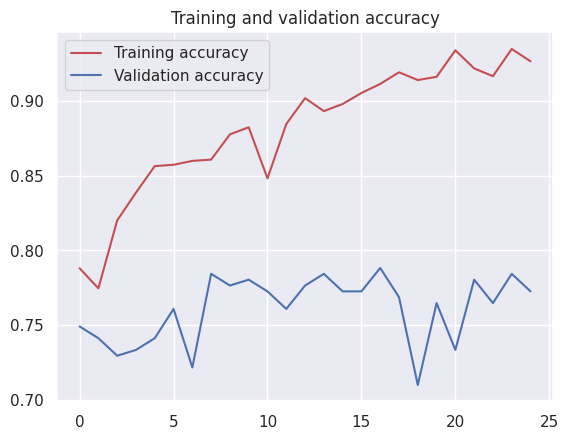

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_loss = history.history['val_recall']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


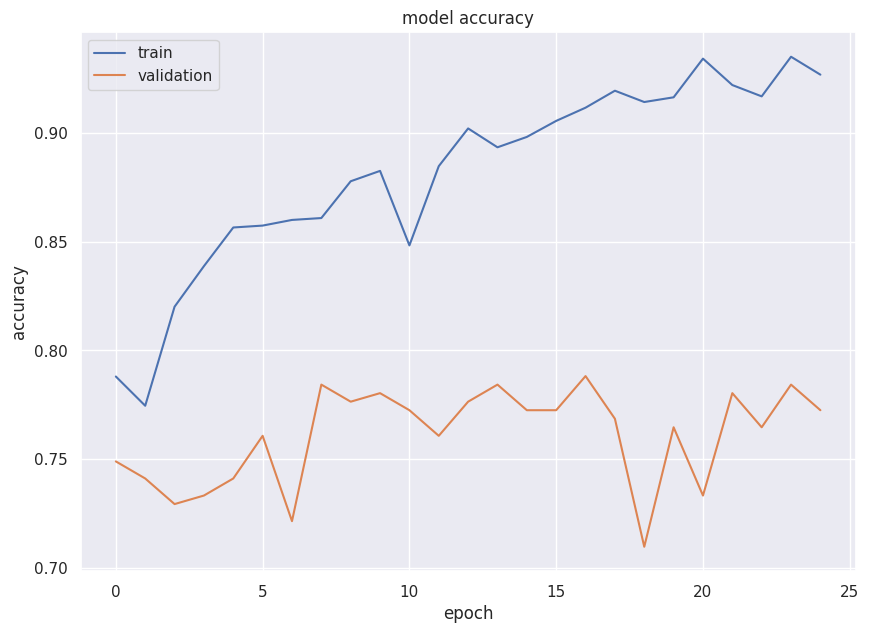

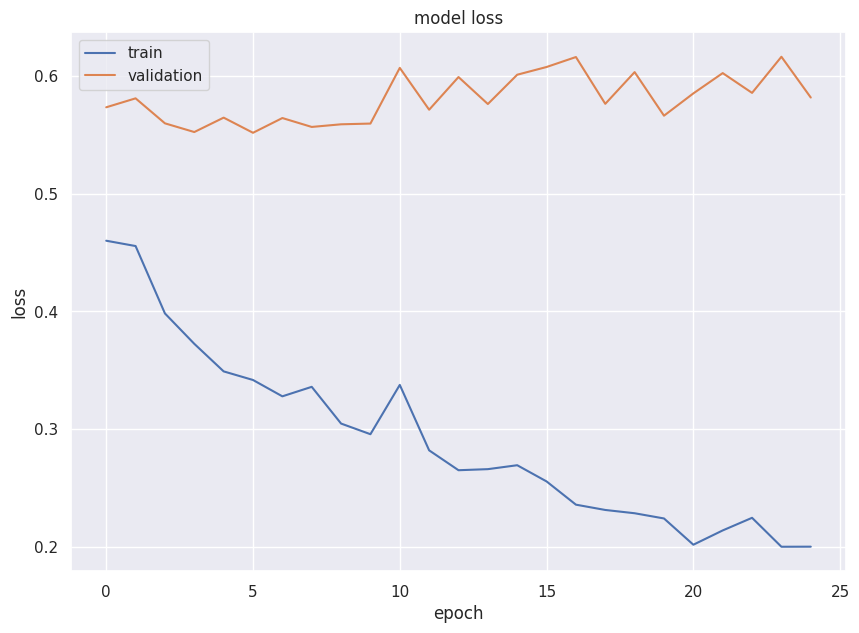

In [ ]:
print(history.history.keys())

# summarize history for accuracy
plt.figure(figsize=(10,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

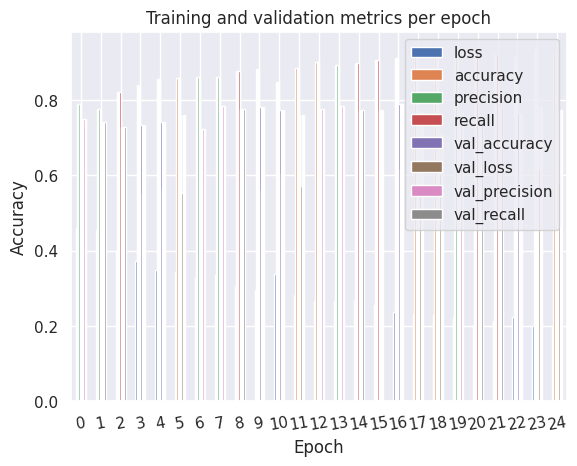

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(len(acc))

df = pd.DataFrame({'loss': loss,
                   'accuracy': acc,
                   'precision': precision,
                   'recall': recall,
                   'val_accuracy': val_acc,
                   'val_loss': val_loss,
                   'val_precision': val_precision,
                   'val_recall': val_recall}, index=epochs)

ax = df.plot.bar(rot=10)
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.set_title('Training and validation metrics per epoch')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

df = pd.DataFrame({'loss': loss,
                   'accuracy': acc,
                   'precision': precision,
                   'recall': recall,
                   'val_accuracy': val_acc,
                   'val_loss': val_loss,
                   'val_precision': val_precision,
                   'val_recall': val_recall}, index=epochs)


In [ ]:
df.head()

,loss,accuracy,precision,recall,val_accuracy,val_loss,val_precision,val_recall
0,0.460128,0.788036,0.788036,0.788036,0.749020,0.573612,0.749020,0.749020
1,0.455601,0.774599,0.774599,0.774599,0.741176,0.581216,0.741176,0.741176
2,0.398278,0.820113,0.820113,0.820113,0.729412,0.559968,0.729412,0.729412
3,0.372445,0.838752,0.838752,0.838752,0.733333,0.552569,0.733333,0.733333
4,0.348996,0.856524,0.856524,0.856524,0.741176,0.564813,0.741176,0.741176


In [ ]:
df.columns

Index(['loss', 'accuracy', 'precision', 'recall', 'val_accuracy', 'val_loss',
       'val_precision', 'val_recall'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   loss           25 non-null     float64
 1   accuracy       25 non-null     float64
 2   precision      25 non-null     float64
 3   recall         25 non-null     float64
 4   val_accuracy   25 non-null     float64
 5   val_loss       25 non-null     float64
 6   val_precision  25 non-null     float64
 7   val_recall     25 non-null     float64
dtypes: float64(8)
memory usage: 1.7 KB


In [ ]:
df.shape

(25, 8)

In [ ]:
df.size

200

In [ ]:
df.describe()

,loss,accuracy,precision,recall,val_accuracy,val_loss,val_precision,val_recall
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,0.290969,0.881786,0.881786,0.881786,0.760941,0.580934,0.760941,0.760941
std,0.076026,0.043576,0.043576,0.043576,0.022226,0.020645,0.022226,0.022226
min,0.199850,0.774599,0.774599,0.774599,0.709804,0.551933,0.709804,0.709804
25%,0.228346,0.857391,0.857391,0.857391,0.741176,0.564468,0.741176,0.741176
50%,0.269188,0.893368,0.893368,0.893368,0.768627,0.576553,0.768627,0.768627
75%,0.337499,0.916342,0.916342,0.916342,0.776471,0.601312,0.776471,0.776471
max,0.460128,0.934981,0.934981,0.934981,0.788235,0.616596,0.788235,0.788235


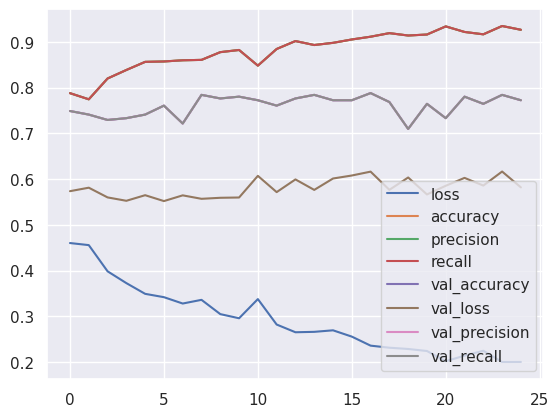

In [ ]:
df.plot()
plt.show()

Text(0, 0.5, 'Frequency')

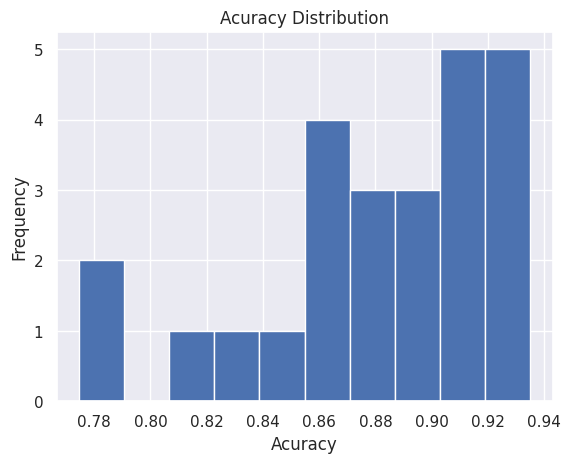

In [ ]:
df['accuracy'].hist()
plt.title('Acuracy Distribution')
plt.xlabel('Acuracy')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

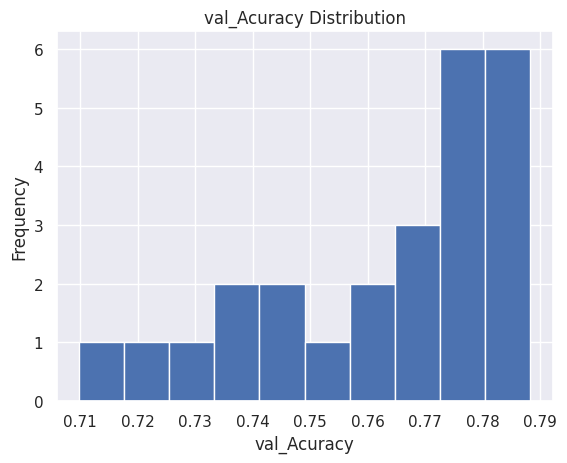

In [ ]:
df['val_accuracy'].hist()
plt.title('val_Acuracy Distribution')
plt.xlabel('val_Acuracy')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

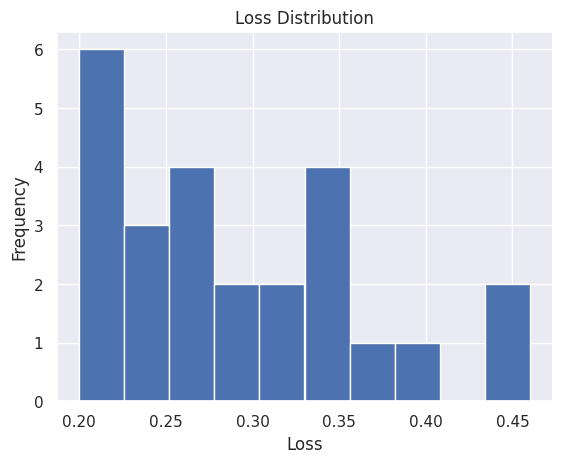

In [ ]:
df['loss'].hist()
plt.title('Loss Distribution')
plt.xlabel('Loss')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

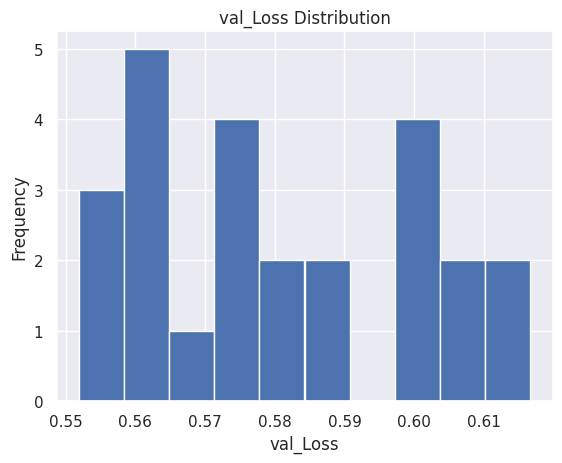

In [ ]:
df['val_loss'].hist()
plt.title('val_Loss Distribution')
plt.xlabel('val_Loss')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

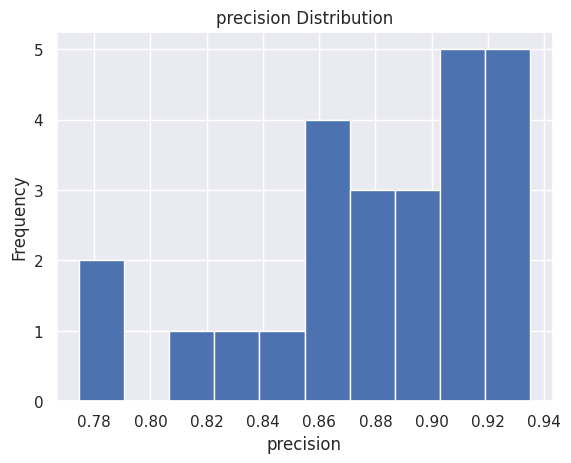

In [ ]:
df['precision'].hist()
plt.title('precision Distribution')
plt.xlabel('precision')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

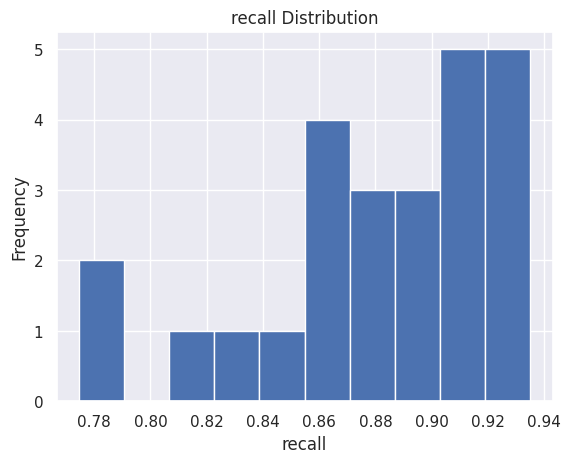

In [ ]:
df['recall'].hist()
plt.title('recall Distribution')
plt.xlabel('recall')
plt.ylabel('Frequency')

In [ ]:
correlation = df.corr()
correlation

,loss,accuracy,precision,recall,val_accuracy,val_loss,val_precision,val_recall
loss,1.000000,-0.993849,-0.993849,-0.993849,-0.364051,-0.493546,-0.364051,-0.364051
accuracy,-0.993849,1.000000,1.000000,1.000000,0.372710,0.460873,0.372710,0.372710
precision,-0.993849,1.000000,1.000000,1.000000,0.372710,0.460873,0.372710,0.372710
recall,-0.993849,1.000000,1.000000,1.000000,0.372710,0.460873,0.372710,0.372710
val_accuracy,-0.364051,0.372710,0.372710,0.372710,1.000000,0.281947,1.000000,1.000000
val_loss,-0.493546,0.460873,0.460873,0.460873,0.281947,1.000000,0.281947,0.281947
val_precision,-0.364051,0.372710,0.372710,0.372710,1.000000,0.281947,1.000000,1.000000
val_recall,-0.364051,0.372710,0.372710,0.372710,1.000000,0.281947,1.000000,1.000000


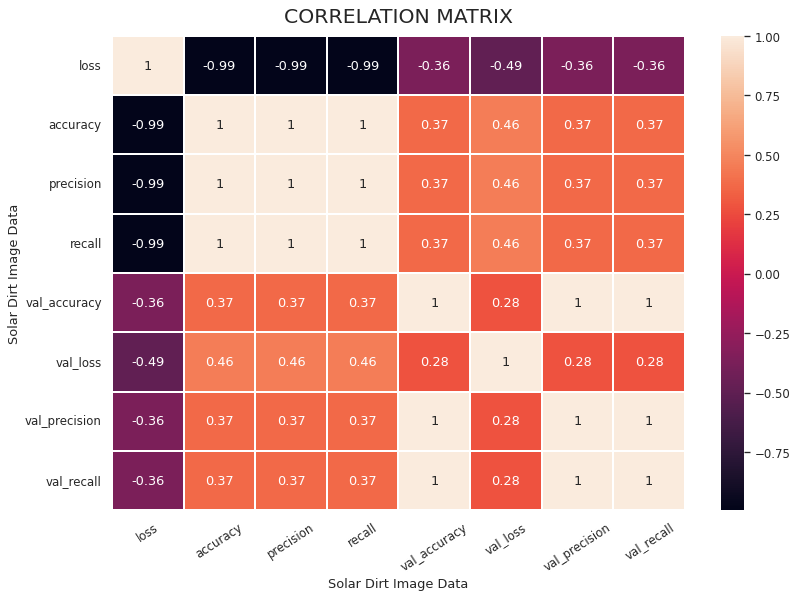

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Solar Dirt Image Data')
plt.ylabel('Solar Dirt Image Data')
plt.xticks(rotation=33)
plt.show()

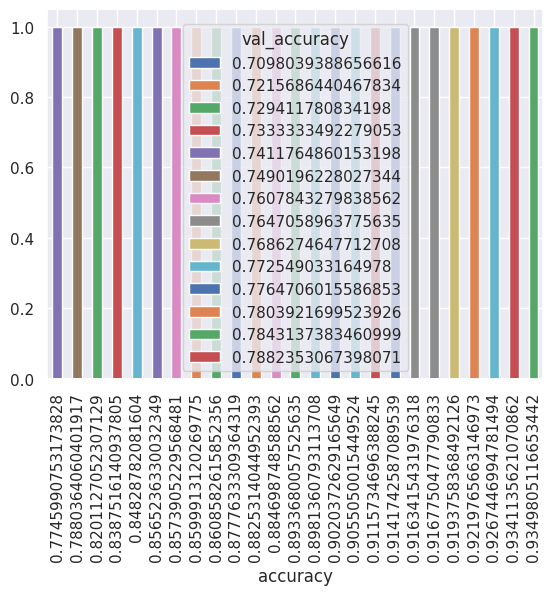

In [ ]:

x = 'accuracy'
y = 'val_accuracy'
pd.crosstab(df[x],df[y]).plot(kind='bar', stacked=True)
plt.show()


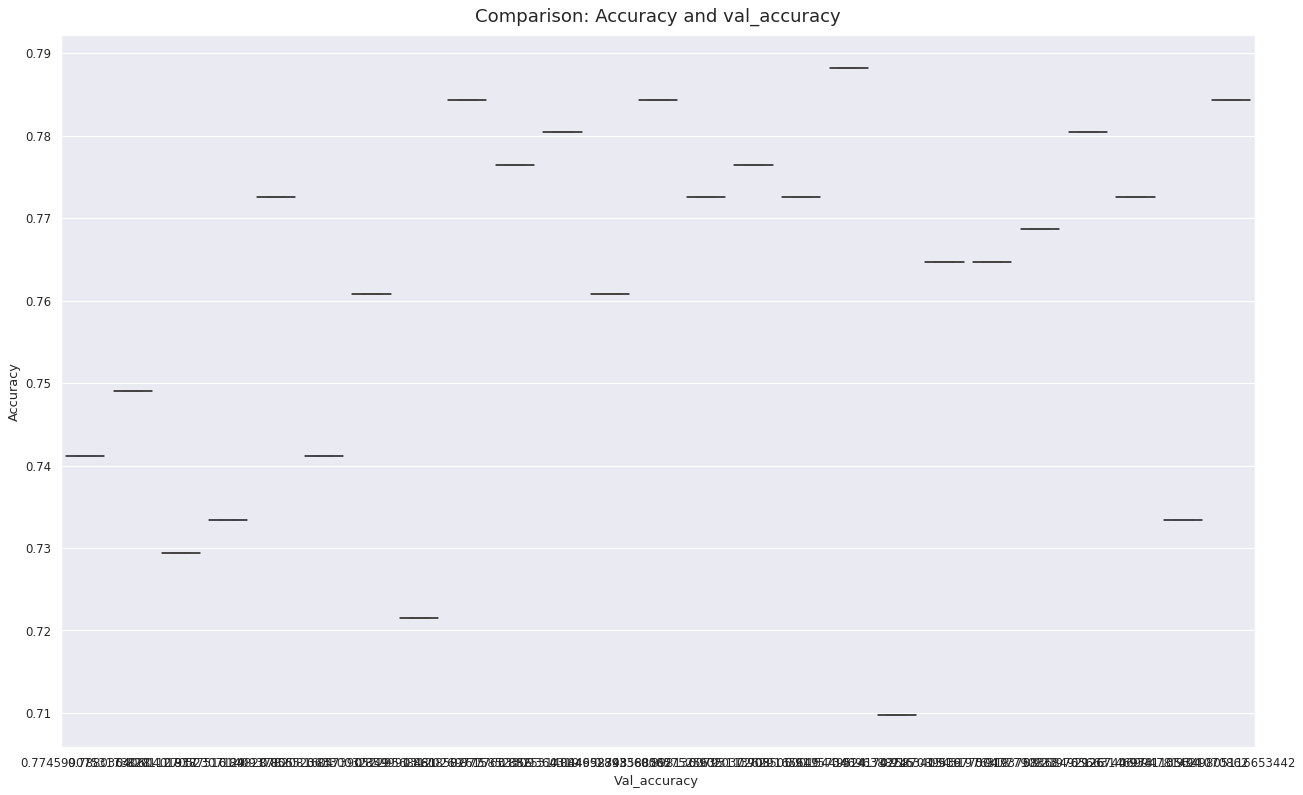

In [ ]:
plt.figure(figsize=(20,12), dpi=77)
sns.boxplot(x="accuracy", y="val_accuracy", data=df)
plt.title("Comparison: Accuracy and val_accuracy", size=17, pad=13)
plt.ylabel('Accuracy')
plt.xlabel('Val_accuracy ')
plt.show()

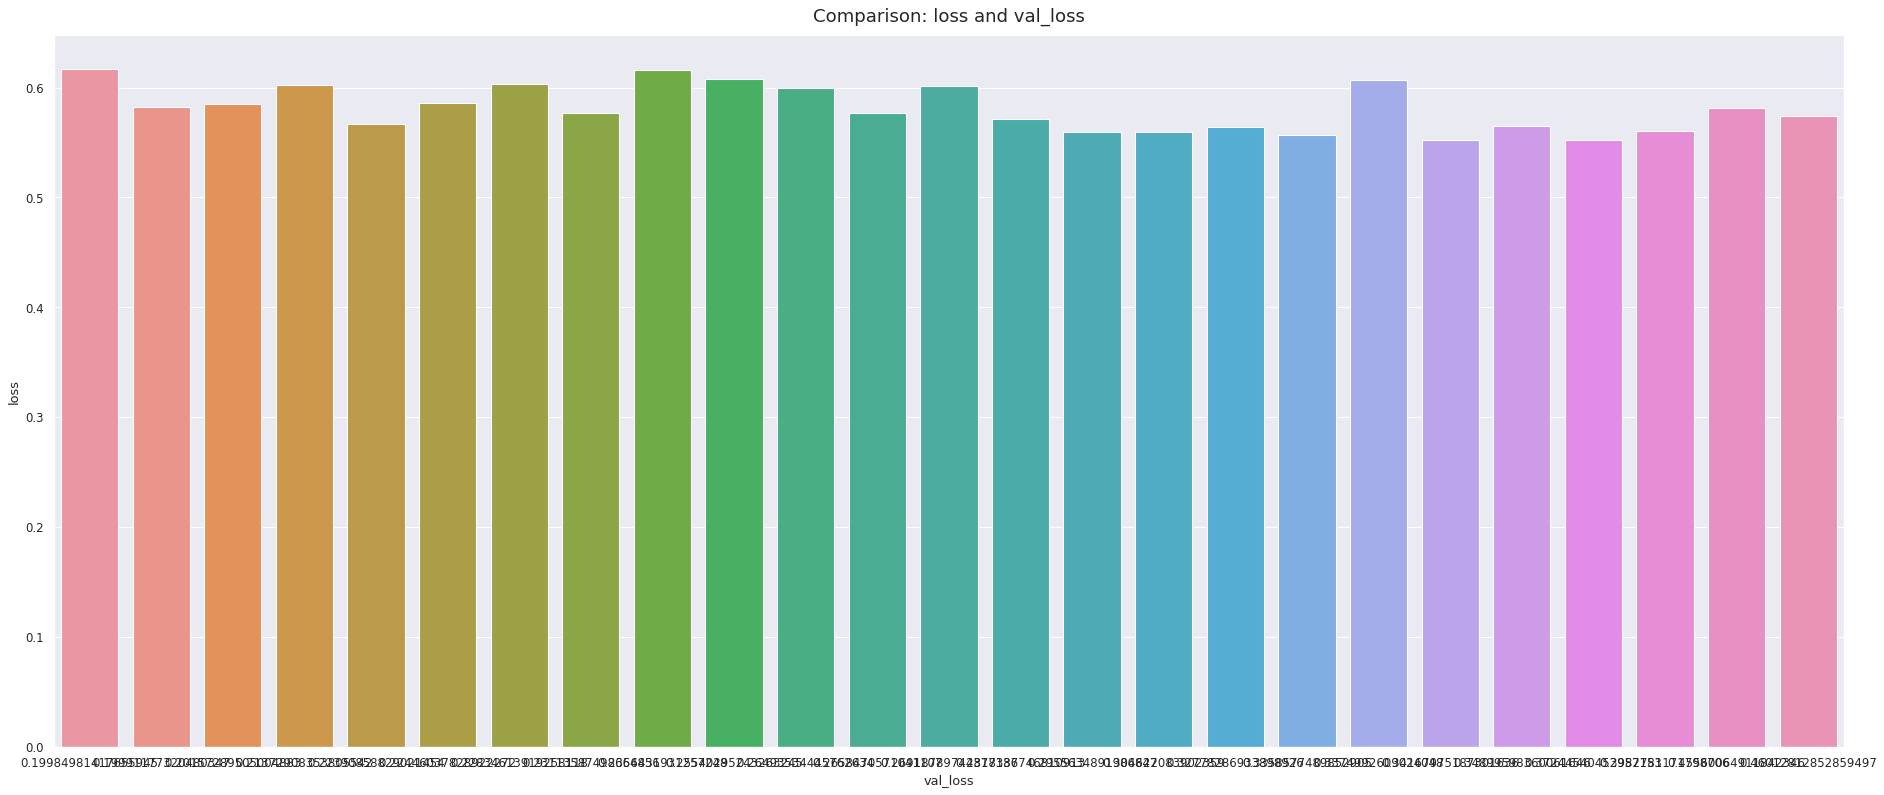

In [ ]:
plt.figure(figsize=(30,12), dpi=77)
sns.barplot(x="loss", y="val_loss", data=df)
plt.title("Comparison: loss and val_loss", size=17, pad=13)
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.show()

<Axes: xlabel='accuracy', ylabel='count'>

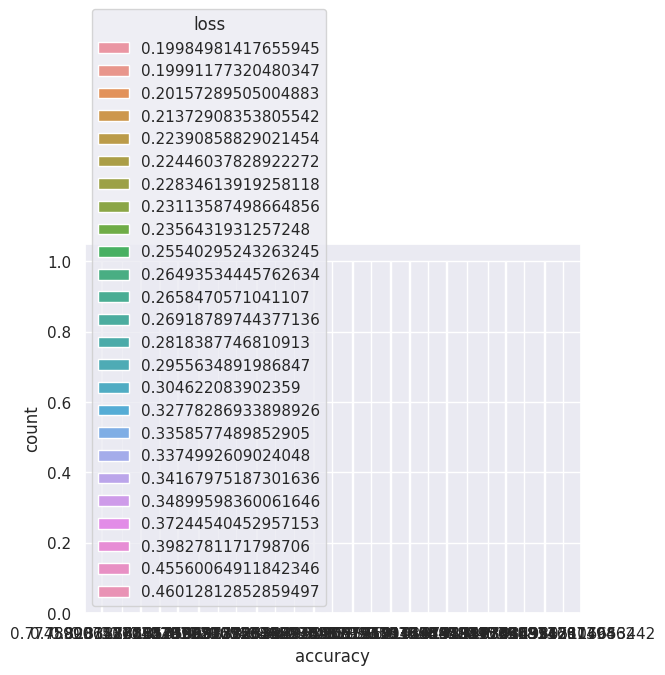

In [ ]:
sns.countplot(x='accuracy', hue='loss', data=df)

In [ ]:
df.groupby(['accuracy']).accuracy.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
accuracy,,,,,
0.774599,1,0.774599,0.774599,0.774599,0.774599
0.788036,1,0.788036,0.788036,0.788036,0.788036
0.820113,1,0.820113,0.820113,0.820113,0.820113
0.838752,1,0.838752,0.838752,0.838752,0.838752
0.848288,1,0.848288,0.848288,0.848288,0.848288
0.856524,1,0.856524,0.856524,0.856524,0.856524
0.857391,1,0.857391,0.857391,0.857391,0.857391
0.859991,1,0.859991,0.859991,0.859991,0.859991
0.860858,1,0.860858,0.860858,0.860858,0.860858


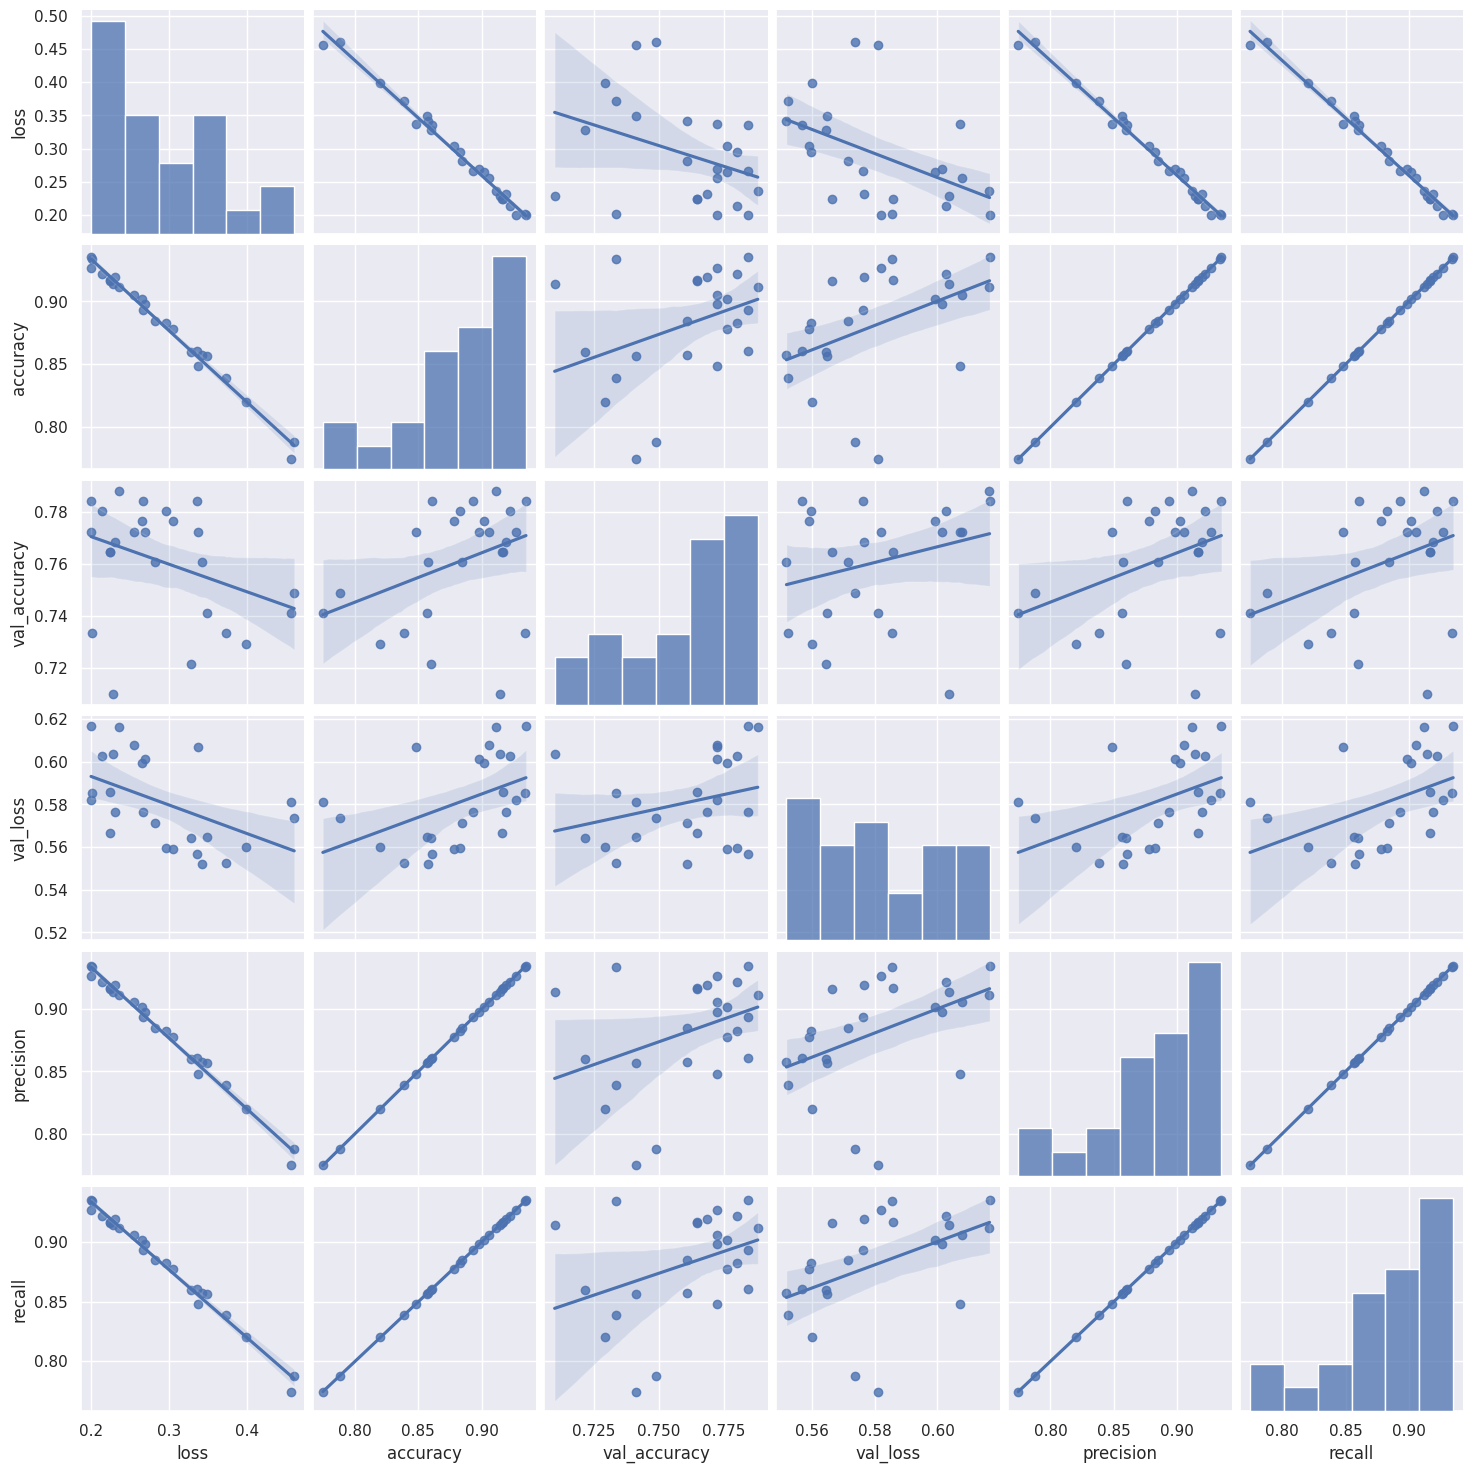

In [ ]:
cols = [ 'loss','accuracy', 'val_accuracy', 'val_loss', 'precision','recall']
sns.pairplot(data= df, vars=cols, kind='reg')
plt.show()

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)
print(df)

        loss  accuracy  precision    recall  val_accuracy  val_loss  \
0   0.460128  0.788036   0.788036  0.788036      0.749020  0.573612   
1   0.455601  0.774599   0.774599  0.774599      0.741176  0.581216   
2   0.398278  0.820113   0.820113  0.820113      0.729412  0.559968   
3   0.372445  0.838752   0.838752  0.838752      0.733333  0.552569   
4   0.348996  0.856524   0.856524  0.856524      0.741176  0.564813   
5   0.341680  0.857391   0.857391  0.857391      0.760784  0.551933   
6   0.327783  0.859991   0.859991  0.859991      0.721569  0.564468   
7   0.335858  0.860858   0.860858  0.860858      0.784314  0.556901   
8   0.304622  0.877763   0.877763  0.877763      0.776471  0.559144   
9   0.295563  0.882531   0.882531  0.882531      0.780392  0.559765   
10  0.337499  0.848288   0.848288  0.848288      0.772549  0.607124   
11  0.281839  0.884699   0.884699  0.884699      0.760784  0.571545   
12  0.264935  0.902037   0.902037  0.902037      0.776471  0.599330   
13  0.

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)
print(df)

        loss  accuracy  precision    recall  val_accuracy  val_loss  \
0   0.460128  0.788036   0.788036  0.788036      0.749020  0.573612   
1   0.455601  0.774599   0.774599  0.774599      0.741176  0.581216   
2   0.398278  0.820113   0.820113  0.820113      0.729412  0.559968   
3   0.372445  0.838752   0.838752  0.838752      0.733333  0.552569   
4   0.348996  0.856524   0.856524  0.856524      0.741176  0.564813   
5   0.341680  0.857391   0.857391  0.857391      0.760784  0.551933   
6   0.327783  0.859991   0.859991  0.859991      0.721569  0.564468   
7   0.335858  0.860858   0.860858  0.860858      0.784314  0.556901   
8   0.304622  0.877763   0.877763  0.877763      0.776471  0.559144   
9   0.295563  0.882531   0.882531  0.882531      0.780392  0.559765   
10  0.337499  0.848288   0.848288  0.848288      0.772549  0.607124   
11  0.281839  0.884699   0.884699  0.884699      0.760784  0.571545   
12  0.264935  0.902037   0.902037  0.902037      0.776471  0.599330   
13  0.

In [ ]:
df.fillna(df.mean(), inplace=True)
print(df)

        loss  accuracy  precision    recall  val_accuracy  val_loss  \
0   0.460128  0.788036   0.788036  0.788036      0.749020  0.573612   
1   0.455601  0.774599   0.774599  0.774599      0.741176  0.581216   
2   0.398278  0.820113   0.820113  0.820113      0.729412  0.559968   
3   0.372445  0.838752   0.838752  0.838752      0.733333  0.552569   
4   0.348996  0.856524   0.856524  0.856524      0.741176  0.564813   
5   0.341680  0.857391   0.857391  0.857391      0.760784  0.551933   
6   0.327783  0.859991   0.859991  0.859991      0.721569  0.564468   
7   0.335858  0.860858   0.860858  0.860858      0.784314  0.556901   
8   0.304622  0.877763   0.877763  0.877763      0.776471  0.559144   
9   0.295563  0.882531   0.882531  0.882531      0.780392  0.559765   
10  0.337499  0.848288   0.848288  0.848288      0.772549  0.607124   
11  0.281839  0.884699   0.884699  0.884699      0.760784  0.571545   
12  0.264935  0.902037   0.902037  0.902037      0.776471  0.599330   
13  0.

In [ ]:
df.mean()

loss             0.290969
accuracy         0.881786
precision        0.881786
recall           0.881786
val_accuracy     0.760941
val_loss         0.580934
val_precision    0.760941
val_recall       0.760941
dtype: float64

F-1 score = 0.8818

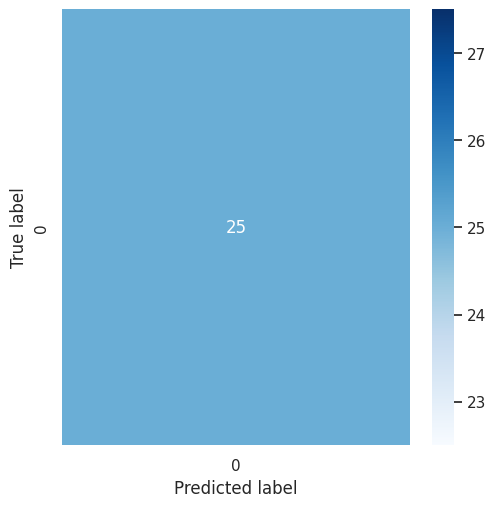

In [ ]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import tensorflow as tf
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

con_mat_df=tf.math.confusion_matrix(
   acc,loss
)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()